In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


QUESTION 1

part 1

In [56]:
def simulation(N):
    profit = 0
    for i in range(N):
        random_number = random.randint(1, 38)
        if random_number <= 18:
            profit += 1
        else:
            profit -= 1
    return profit
print("Please enter N:")
N = int(input())
ans = simulation(N)
print("our profit after",N,"round is:", ans)


Please enter N:
our profit after 432 round is: -4


Description:

We know that there are 38 places in our roulette and we know that 18 of these places are black, so the probability that we win the bet is 18/38
So we used the function randint(1, 38) and since the probability of choosing each of these 38 places is the same, we said that if the number chosen is between 1 and 18, it means that black is chosen and we win the bet and add one to our profit, but if another number is chosen, it means that the roulette is green or red and we lose the bet and our profit is reduced by one
By repeating this experiment, we guess that because the mathematical expectation of the game is negative, in the long run the casino will make a profit
E(x) = 18/38 * 1 + 20/38 * (-1) = (-2/38).

part 2

for N = 10 mean_profit: -6.0 standard_error: 0.009985350825083714
for N = 25 mean_profit: -6.0 standard_error: 0.015798030256965582
for N = 100 mean_profit: -6.0 standard_error: 0.03172848247237803
for N = 1000 mean_profit: -6.0 standard_error: 0.09992015924468896


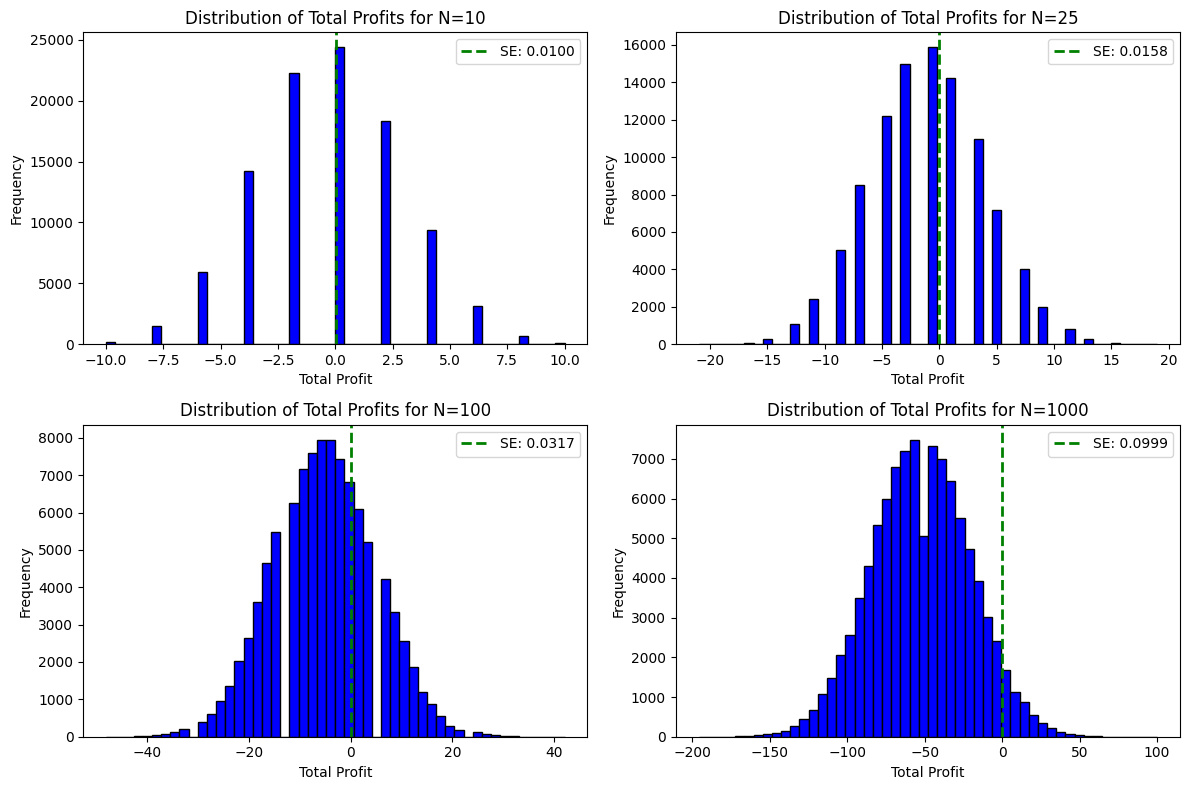

In [ ]:
number_of_rounds_played = [10, 25, 100, 1000]
number_of_simulation = 100000
total_profits = []

for N in number_of_rounds_played:
    profits_for_N = []
    for i in range(number_of_simulation):
        profit = simulation(N)
        profits_for_N.append(profit)
    total_profits.append(profits_for_N)

plt.figure(figsize=(12, 8))

for i in range(len(number_of_rounds_played)):
    N = number_of_rounds_played[i]
    profits = total_profits[i]
    mean_profit = np.mean(profit)
    var_profit = np.var(profits)
    std_error = np.sqrt(var_profit) / np.sqrt(number_of_simulation)
    print("for N =",N,"mean_profit:",mean_profit,"standard_error:",std_error)
    plt.subplot(2, 2, i + 1)
    plt.hist(profits, bins=50, color='b', edgecolor='black')
    plt.axvline(std_error, color='g', linestyle='dashed', linewidth=2, label=f'SE: {std_error:.4f}')
    plt.title(f'Distribution of Total Profits for N={N}')
    plt.xlabel('Total Profit')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


Description:

We run the simulation 100,000 times for different N and display the resulting profit in the graph.
According to the obtained graphs, we observe that the larger N, the graph obtained becomes closer to the normal distribution.
As N increases.

As N (the number of rounds of the game) increases, the standard error increases

part 3

for N = 10 mean_profit: -0.053938 standard_error: 0.0010023846175794995
for N = 25 mean_profit: -0.0522496 standard_error: 0.000634523280107515
for N = 100 mean_profit: -0.0529492 standard_error: 0.0003162416515792946
for N = 1000 mean_profit: -0.05272642000000002 standard_error: 9.97163113027954e-05


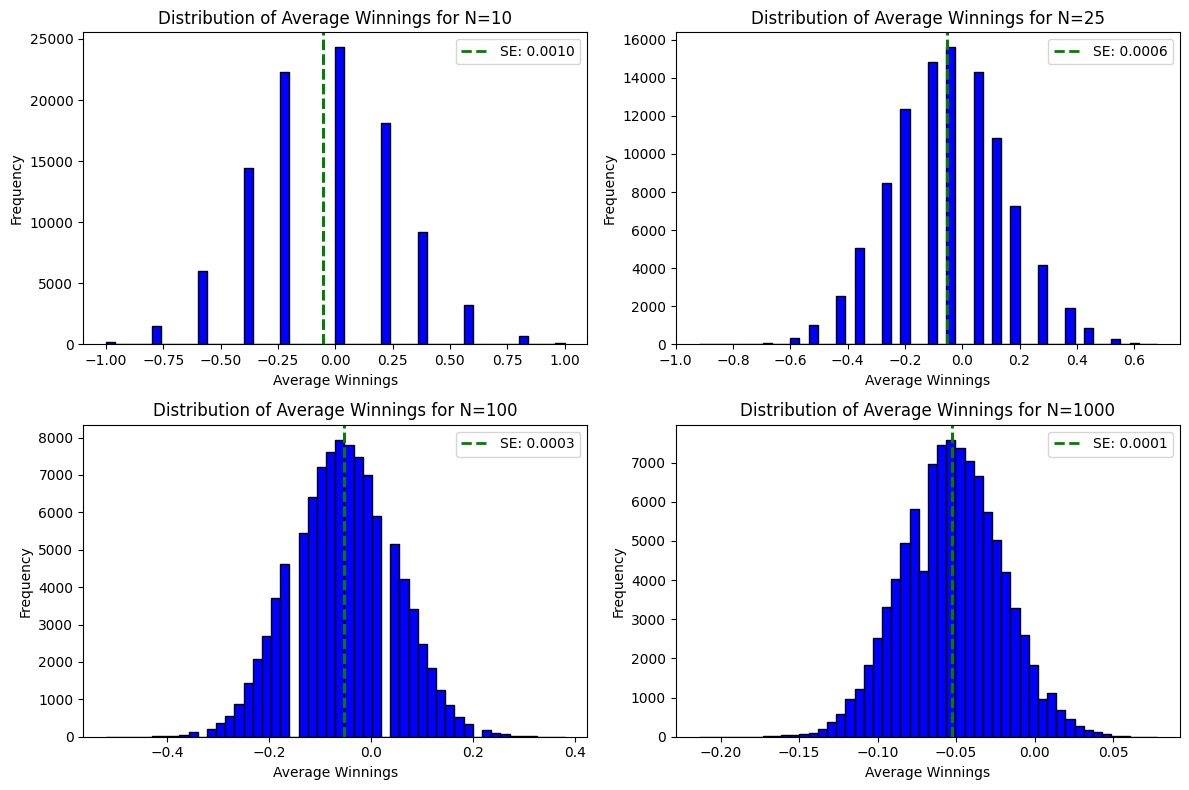

In [72]:
for N in number_of_rounds_played:
    profits_for_N = []
    for i in range(number_of_simulation):
        profit = simulation(N) / N
        profits_for_N.append(profit)
    total_profits.append(profits_for_N)
plt.figure(figsize=(12, 8))
for i in range(len(number_of_rounds_played)):
    N = number_of_rounds_played[i]
    profits = total_profits[i]
    mean_profit = np.mean(profits)
    var_profit = np.var(profits)
    std_error = np.sqrt(var_profit) / np.sqrt(number_of_simulation)
    print("for N =",N,"mean_profit:",mean_profit,"standard_error:",std_error)
    plt.subplot(2, 2, i+1)
    plt.hist(profits, bins=50, color='b', edgecolor='black')
    plt.axvline(mean_profit + std_error, color='g', linestyle='dashed', linewidth=2, label=f'SE: {std_error:.4f}')
    plt.axvline(mean_profit - std_error, color='g', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of Average Winnings for N={N}')
    plt.xlabel('Average Winnings')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


We see that with increasing and the standard error rate decreases

Note:

The difference between the second and third questions is that in the second question, the variance increases with increasing n because the variables are independent, so the variances are added and the standard error value increases. In the second question, since we are dividing the expression by n, the standard error value decreases with increasing n.

part 4

E[Sn] = N ⋅ E[X]

Var(Sn) = N . Var(Sn)

When running M simulations, the standard error (SE) of the simulated mean is sqrt(Var(Sn)) / sqrt(M)

M = 100000

In [73]:
M = number_of_simulation 
win = 18 / 38
loss = 20 / 38
E_X = win * 1 + loss * (-1)
Var_X = 1 - (E_X)**2 
for N in number_of_rounds_played:
    E_sn = N * E_X
    Var_sn = N * Var_X
    std_sn = np.sqrt(Var_sn)
    SE = std_sn / np.sqrt(M)
    ######################
    profits_list = []
    for _ in range(M):
        p = simulation(N)
        profits_list.append(p)
    profits = np.array(profits_list)
    E_SN_sim = np.mean(profits)
    std_SN_sim = np.std(profits, ddof=1)
    SE_SN_sim = std_SN_sim / np.sqrt(M)
    
    print(f"N = {N}")
    print(f"Theory E[Sn] = {E_sn:.4f}")
    print(f"Theory Std(Sn) = {std_sn:.4f}")
    print(f"Theory Se = {SE:.4f}")
    print(f"Sim E[Sn] = {E_SN_sim:.4f}")
    print(f"Sim Std(Sn) = {std_SN_sim:.4f}")
    print(f"Sim Se = {SE_SN_sim:.4f}")
    print("---------------------------------------------------------")


N = 10
Theory E[Sn] = -0.5263
Theory Std(Sn) = 3.1579
Theory Se = 0.0100
Sim E[Sn] = -0.5410
Sim Std(Sn) = 3.1549
Sim Se = 0.0100
---------------------------------------------------------
N = 25
Theory E[Sn] = -1.3158
Theory Std(Sn) = 4.9931
Theory Se = 0.0158
Sim E[Sn] = -1.3200
Sim Std(Sn) = 4.9881
Sim Se = 0.0158
---------------------------------------------------------
N = 100
Theory E[Sn] = -5.2632
Theory Std(Sn) = 9.9861
Theory Se = 0.0316
Sim E[Sn] = -5.2359
Sim Std(Sn) = 9.9510
Sim Se = 0.0315
---------------------------------------------------------
N = 1000
Theory E[Sn] = -52.6316
Theory Std(Sn) = 31.5789
Theory Se = 0.0999
Sim E[Sn] = -52.6750
Sim Std(Sn) = 31.4647
Sim Se = 0.0995
---------------------------------------------------------


part 5

In [ ]:
N = 25
E_sn = N * E_X
Var_sn = N * Var_X
std_sn = np.sqrt(Var_sn)
Z = (0 - E_sn) / std_sn
ans = 1 - stats.norm.cdf(Z)


profits = []
for _ in range(M):
    profits.append(simulation(N))
profits = np.array(profits)
ans2 = np.mean(profits > 0) 
print(f"CLT = {ans:.4f}")
print(f"Monte Carlo = {ans2:.4f}")


CLT = 0.3961
Monte Carlo = 0.3952


In the simulation, we only considered positive values ​​because we want us to win and the casino to lose.

part 6

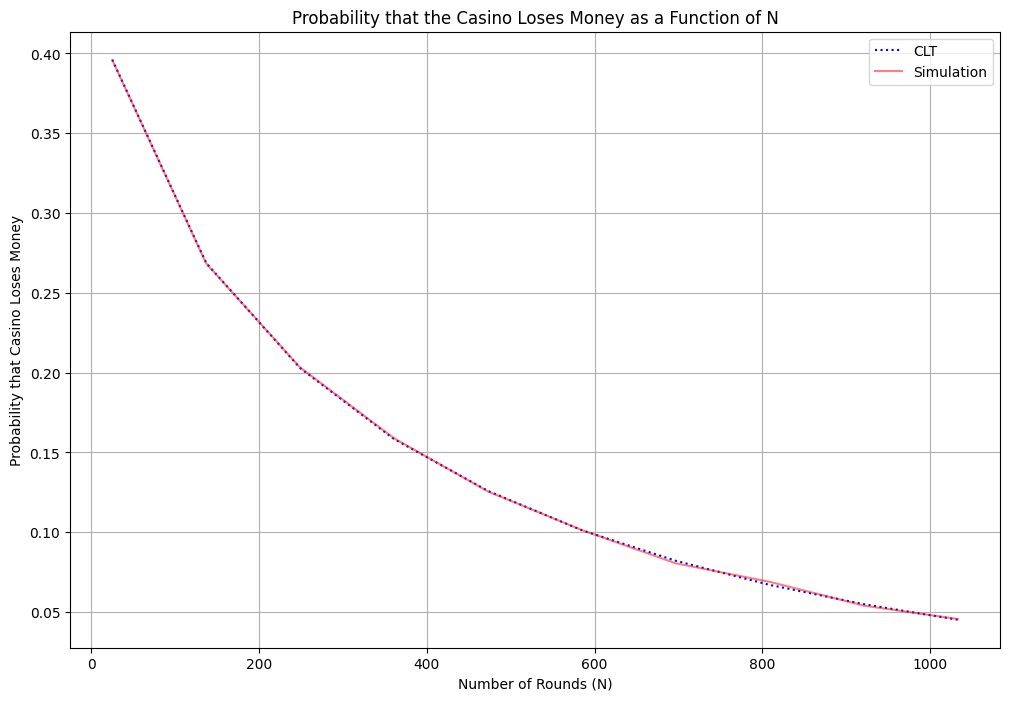

In [54]:
N_values = np.arange(25, 1131, 112)
clt = []
simu = []
for N in N_values:
    E_sn = N * E_X
    Var_sn = N * Var_X
    std_sn = np.sqrt(Var_sn)
    Z = (0 - E_sn) / std_sn
    ans = 1 - stats.norm.cdf(Z)
    clt.append(ans)
    profits = []
    for _ in range(M):
        profits.append(simulation(N))
    profits = np.array(profits)
    ans2 = np.mean(profits > 0) 
    simu.append(ans2)
plt.figure(figsize=(12, 8))
plt.plot(N_values, clt, label="CLT", linestyle='dotted', color='blue')
plt.plot(N_values, simu, label="Simulation", color='red', alpha=0.5)
plt.xlabel("Number of Rounds (N)")
plt.ylabel("Probability that Casino Loses Money")
plt.title("Probability that the Casino Loses Money as a Function of N")
plt.legend()
plt.grid()
plt.show()


Description:

We see that if the number of rounds we play increases, the casino's loss rate decreases greatly, and over a very large number of games, the casino's loss rate approaches 0.
In each round, the expected value of the casino's profit (𝐸x)
is positive, meaning that in the long run, players will lose more money than they win.
As N increases, the variance of the total profit (𝑆n)
also increases, but it grows at a slower rate relative to the expected value. This results in a lower probability of the casino losing money.
The Central Limit Theorem (CLT) shows that as the number of rounds increases, the distribution of total profits becomes more normal, and its expected value shifts toward the casino’s profit.